In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore



In [3]:
# Path dataset
base_path = r"C:\Users\harit\Downloads\daily+and+sports+activities\data"
print(f"Dataset path: {base_path}")

# Subjek untuk pelatihan dan pengujian
train_subjects = [f"p{i}" for i in range(1, 6)]  # p1 hingga p5
test_subjects = [f"p{i}" for i in range(6, 9)]   # p6 hingga p8
print(f"Training subjects: {train_subjects}")
print(f"Testing subjects: {test_subjects}")

# Aktivitas dan segmen
activities = [f"a{str(i).zfill(2)}" for i in range(1, 20)]  # a01 hingga a19
segments = [f"s{str(i).zfill(2)}" for i in range(1, 61)]    # s01 hingga s60

Dataset path: C:\Users\harit\Downloads\daily+and+sports+activities\data
Training subjects: ['p1', 'p2', 'p3', 'p4', 'p5']
Testing subjects: ['p6', 'p7', 'p8']


In [4]:
# Dictionary nama aktivitas
activity_names = {
    'a01': 'sitting', 'a02': 'standing', 'a03': 'lying on back', 'a04': 'lying on right side',
    'a05': 'ascending stairs', 'a06': 'descending stairs', 'a07': 'standing in elevator still',
    'a08': 'moving around in elevator', 'a09': 'walking in parking lot',
    'a10': 'walking on treadmill flat', 'a11': 'walking on treadmill inclined',
    'a12': 'running on treadmill', 'a13': 'exercising on stepper', 'a14': 'exercising on cross trainer',
    'a15': 'cycling horizontal', 'a16': 'cycling vertical', 'a17': 'rowing', 'a18': 'jumping',
    'a19': 'playing basketball'
}

In [5]:
def extract_features(file_path):
    print(f"Extracting features from: {file_path}")
    data = pd.read_csv(file_path, header=None)
    feature_vector = np.concatenate([
        data.mean(), data.std(), data.skew(), data.kurtosis()
    ])
    print(f"Feature vector shape for {file_path}: {feature_vector.shape}")
    return feature_vector

In [6]:
# Mengumpulkan data pelatihan
train_features = []
train_labels = []
train_file_paths = []
print("Starting to collect training data...")
for activity in activities:
    for subject in train_subjects:
        for segment in segments:
            file_path = os.path.join(base_path, activity, subject, f"{segment}.txt")
            if os.path.exists(file_path):
                feature_vector = extract_features(file_path)
                train_features.append(feature_vector)
                train_labels.append(activity_names[activity])
                train_file_paths.append(file_path)
            else:
                print(f"File not found: {file_path}")
print(f"Total training segments collected: {len(train_features)}")

Starting to collect training data...
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s01.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s01.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s02.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s02.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s03.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s03.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s04.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s04.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p1\s05.txt
Feature vector shape for C:\Users\harit\Down

In [7]:
# Mengumpulkan data pengujian
test_features = []
test_labels = []
test_file_paths = []
print("Starting to collect testing data...")
for activity in activities:
    for subject in test_subjects:
        for segment in segments:
            file_path = os.path.join(base_path, activity, subject, f"{segment}.txt")
            if os.path.exists(file_path):
                feature_vector = extract_features(file_path)
                test_features.append(feature_vector)
                test_labels.append(activity_names[activity])
                test_file_paths.append(file_path)
            else:
                print(f"File not found: {file_path}")
print(f"Total testing segments collected: {len(test_features)}")

Starting to collect testing data...
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s01.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s01.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s02.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s02.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s03.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s03.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s04.txt
Feature vector shape for C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s04.txt: (180,)
Extracting features from: C:\Users\harit\Downloads\daily+and+sports+activities\data\a01\p6\s05.txt
Feature vector shape for C:\Users\harit\Downl

In [8]:
# Konversi ke array NumPy
train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
print(f"Train features shape: {train_features.shape}")
print(f"Test features shape: {test_features.shape}")

Train features shape: (5700, 180)
Test features shape: (3420, 180)


In [9]:
# Normalisasi fitur
print("Normalizing features...")
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

Normalizing features...


In [10]:
# Encode label
print("Encoding labels...")
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
test_labels_encoded = le.transform(test_labels)

Encoding labels...


In [11]:
# Distribusi label
train_label_counts = pd.Series(train_labels).value_counts()
test_label_counts = pd.Series(test_labels).value_counts()
print("\nDistribution of training labels:")
for activity, count in train_label_counts.items():
    print(f"{activity}: {count}")
print("\nDistribution of testing labels:")
for activity, count in test_label_counts.items():
    print(f"{activity}: {count}")


Distribution of training labels:
sitting: 300
walking on treadmill inclined: 300
jumping: 300
rowing: 300
cycling vertical: 300
cycling horizontal: 300
exercising on cross trainer: 300
exercising on stepper: 300
running on treadmill: 300
walking on treadmill flat: 300
standing: 300
walking in parking lot: 300
moving around in elevator: 300
standing in elevator still: 300
descending stairs: 300
ascending stairs: 300
lying on right side: 300
lying on back: 300
playing basketball: 300

Distribution of testing labels:
sitting: 180
walking on treadmill inclined: 180
jumping: 180
rowing: 180
cycling vertical: 180
cycling horizontal: 180
exercising on cross trainer: 180
exercising on stepper: 180
running on treadmill: 180
walking on treadmill flat: 180
standing: 180
walking in parking lot: 180
moving around in elevator: 180
standing in elevator still: 180
descending stairs: 180
ascending stairs: 180
lying on right side: 180
lying on back: 180
playing basketball: 180


In [12]:
# Latih model Random Forest
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
print("Training Random Forest Model...")
model_rf.fit(train_features, train_labels_encoded)
print("Random Forest Training Completed.")

Training Random Forest Model...
Random Forest Training Completed.


In [13]:
# Prediksi pada data pengujian
y_pred_rf = model_rf.predict(test_features)

# Evaluasi model
rf_accuracy = accuracy_score(test_labels_encoded, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:\n", classification_report(test_labels_encoded, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.91
Random Forest Classification Report:
                                precision    recall  f1-score   support

             ascending stairs       1.00      1.00      1.00       180
           cycling horizontal       1.00      1.00      1.00       180
             cycling vertical       1.00      1.00      1.00       180
            descending stairs       1.00      0.99      1.00       180
  exercising on cross trainer       1.00      1.00      1.00       180
        exercising on stepper       1.00      1.00      1.00       180
                      jumping       1.00      0.97      0.99       180
                lying on back       1.00      1.00      1.00       180
          lying on right side       1.00      1.00      1.00       180
    moving around in elevator       0.82      0.85      0.84       180
           playing basketball       0.97      0.98      0.97       180
                       rowing       1.00      1.00      1.00       180
         

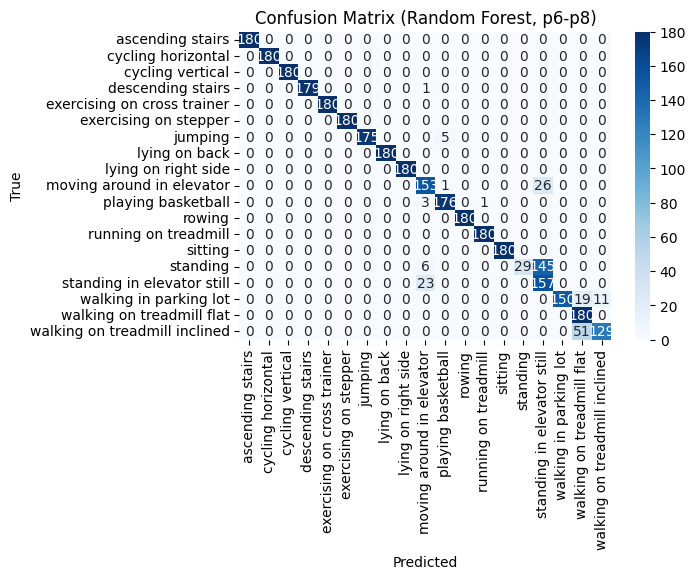

In [14]:
# Visualisasi Confusion Matrix
cm_rf = confusion_matrix(test_labels_encoded, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest, p6-p8)')
plt.savefig('confusion_matrix_rf.png')
plt.show()

In [15]:
# Buat DataFrame untuk data pelatihan
feature_names = [f"Mean_{i}" for i in range(45)] + [f"Std_{i}" for i in range(45)] + \
                [f"Skew_{i}" for i in range(45)] + [f"Kurtosis_{i}" for i in range(45)]
train_df = pd.DataFrame(train_features, columns=feature_names)
train_df['Activity'] = train_labels

In [16]:
# Statistik ringkasan untuk fitur terpilih
selected_features = ['Mean_0', 'Std_0', 'Skew_0', 'Kurtosis_0']
print("\n=== CPMK1: Analisis Statistik Deskriptif ===")
print("\nStatistik Ringkasan untuk Fitur Terpilih (Data Pelatihan):")
print(train_df[selected_features].describe())


=== CPMK1: Analisis Statistik Deskriptif ===

Statistik Ringkasan untuk Fitur Terpilih (Data Pelatihan):
             Mean_0         Std_0        Skew_0    Kurtosis_0
count  5.700000e+03  5.700000e+03  5.700000e+03  5.700000e+03
mean  -4.387913e-16 -1.755165e-15  1.296429e-15 -8.227337e-17
std    1.000088e+00  1.000088e+00  1.000088e+00  1.000088e+00
min   -4.951371e+00 -6.953583e-01 -1.047378e+01 -7.428896e-01
25%    1.990138e-01 -6.397761e-01 -6.277493e-01 -4.115537e-01
50%    3.835296e-01 -2.693897e-01 -1.912634e-02 -2.144232e-01
75%    4.584582e-01  2.028369e-02  7.123420e-01  9.515801e-02
max    7.639095e-01  4.383113e+00  1.130561e+01  2.974413e+01


In [17]:
# Statistik per aktivitas untuk fitur penting (berdasarkan Random Forest)
key_feature = feature_names[np.argmax(model_rf.feature_importances_)]
print(f"\nStatistik {key_feature} per Aktivitas:")
stats_per_activity = train_df.groupby('Activity')[key_feature].agg(['mean', 'std', 'min', 'max'])
print(stats_per_activity)


Statistik Mean_36 per Aktivitas:
                                   mean       std       min       max
Activity                                                             
ascending stairs              -0.437161  0.194191 -0.672732 -0.005402
cycling horizontal             1.773856  0.220410  1.175745  2.129516
cycling vertical               0.377155  0.165730  0.006985  0.729820
descending stairs             -0.486588  0.184194 -0.692377 -0.064436
exercising on cross trainer   -0.631857  0.071895 -0.837941 -0.463692
exercising on stepper         -0.499900  0.077412 -0.699766 -0.297976
jumping                       -0.644860  0.082780 -0.955579 -0.452195
lying on back                  1.708297  0.126385  1.555670  1.898475
lying on right side            1.423248  0.296209  1.124119  1.927375
moving around in elevator     -0.575621  0.087839 -0.682954 -0.184760
playing basketball            -0.658450  0.076555 -0.908044 -0.400525
rowing                         1.838205  0.342048  1.306

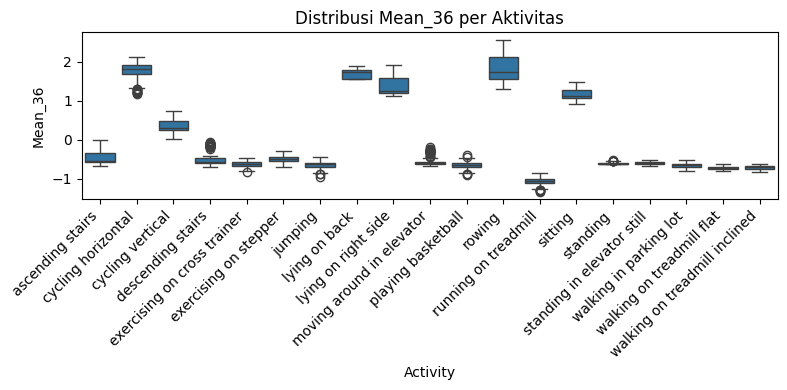

In [18]:
# Visualisasi distribusi fitur penting per aktivitas
plt.figure(figsize=(8, 4))
sns.boxplot(x='Activity', y=key_feature, data=train_df, order=sorted(train_df['Activity'].unique()))
plt.title(f'Distribusi {key_feature} per Aktivitas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distribution_key_feature.png')
plt.show()

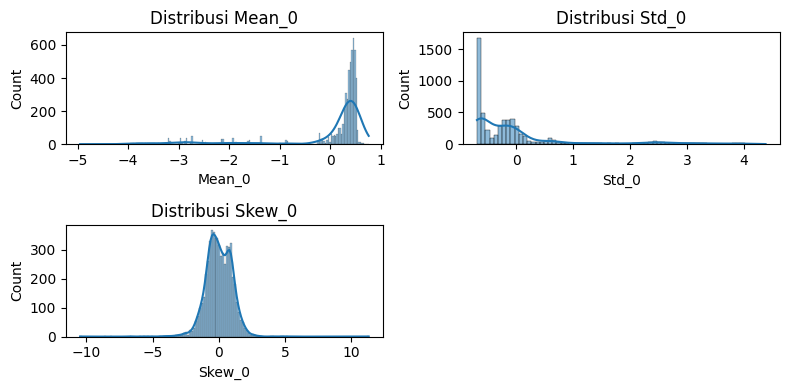

In [19]:
# Histogram untuk beberapa fitur
plt.figure(figsize=(8, 4))
for i, feature in enumerate(selected_features[:3]):
    plt.subplot(2, 2, i+1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.savefig('feature_histograms.png')
plt.show()

In [20]:
# Identifikasi tipe masalah machine learning
print("\nTipe Masalah Machine Learning: Klasifikasi Multi-Kelas (19 kelas aktivitas)")


Tipe Masalah Machine Learning: Klasifikasi Multi-Kelas (19 kelas aktivitas)



=== CPMK2: Training SVM Model ===
SVM Training Completed.
SVM Accuracy: 0.84
SVM Classification Report:
                                precision    recall  f1-score   support

             ascending stairs       0.97      0.99      0.98       180
           cycling horizontal       0.99      0.95      0.97       180
             cycling vertical       1.00      0.93      0.96       180
            descending stairs       0.99      0.97      0.98       180
  exercising on cross trainer       1.00      0.92      0.96       180
        exercising on stepper       1.00      0.99      1.00       180
                      jumping       1.00      0.71      0.83       180
                lying on back       1.00      0.98      0.99       180
          lying on right side       1.00      0.97      0.99       180
    moving around in elevator       0.47      0.72      0.57       180
           playing basketball       0.81      0.87      0.84       180
                       rowing       1.00 

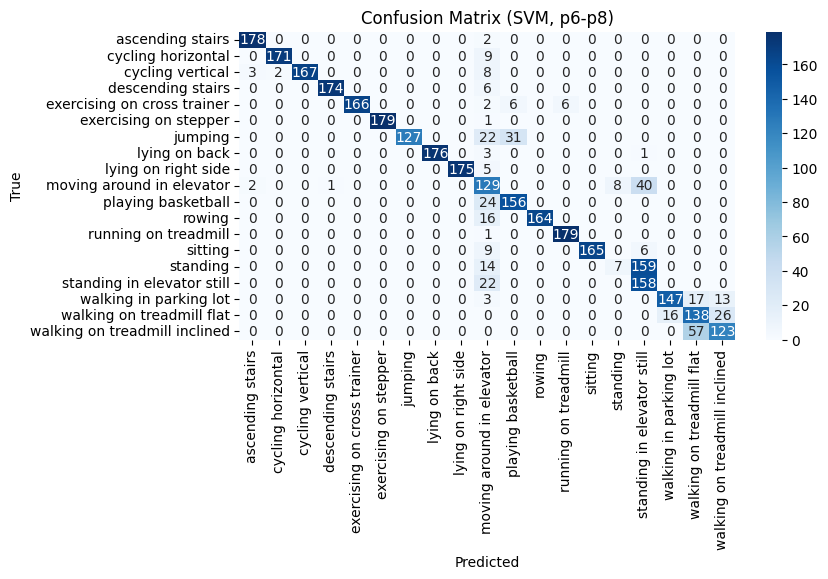

In [21]:
# Supervised Learning (SVM)
from sklearn.svm import SVC

# Latih model SVM
print("\n=== CPMK2: Training SVM Model ===")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(train_features, train_labels_encoded)
print("SVM Training Completed.")

# Prediksi pada data pengujian
y_pred_svm = svm_model.predict(test_features)

# Evaluasi
svm_accuracy = accuracy_score(test_labels_encoded, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:\n", classification_report(test_labels_encoded, y_pred_svm, target_names=le.classes_))

# Visualisasi Confusion Matrix
cm_svm = confusion_matrix(test_labels_encoded, y_pred_svm)
plt.figure(figsize=(8, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM, p6-p8)')
plt.savefig('confusion_matrix_svm.png')
plt.show()


=== CPMK3: PCA Analysis ===


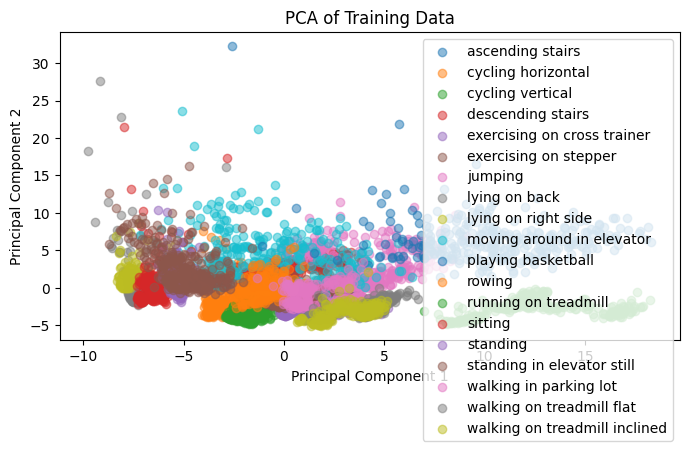

Explained Variance Ratio: [0.17180019 0.06339544]


In [22]:
# Unsupervised Learning (PCA)
from sklearn.decomposition import PCA

# Terapkan PCA
print("\n=== CPMK3: PCA Analysis ===")
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_features)

# Visualisasi PCA
plt.figure(figsize=(8, 4))
for activity in sorted(np.unique(train_labels)):
    idx = train_labels == activity
    plt.scatter(train_pca[idx, 0], train_pca[idx, 1], label=activity, alpha=0.5)
plt.legend()
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca_plot.png')
plt.show()

# Rasio varians yang dijelaskan
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Shape of train_features: (5700, 180)
Shape of train_labels_encoded: (5700,)
Unique values in train_labels_encoded: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

=== CPMK4: Training Neural Network ===
Epoch 1/15
143/143 [==============================] - 1s 3ms/step - loss: 1.0513 - accuracy: 0.7039 - val_loss: 7.5224 - val_accuracy: 0.1070
Epoch 2/15
143/143 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9469 - val_loss: 8.9307 - val_accuracy: 0.1825
Epoch 3/15
143/143 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9649 - val_loss: 9.8293 - val_accuracy: 0.1605
Epoch 4/15
143/143 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9711 - val_loss: 10.4865 - val_accuracy: 0.2061
Epoch 5/15
143/143 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 11.9754 - val_accuracy: 0.2088
Epoch 6/15
143/143 [==============================] - 0s 2ms/step - loss: 

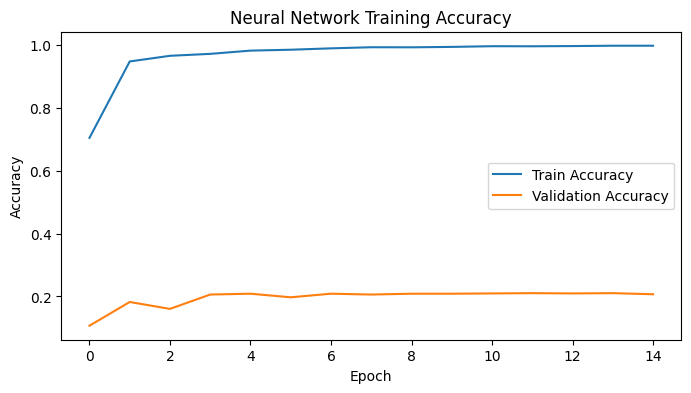

In [23]:
# Cell 5: CPMK4 - Neural Network
# Rancang model neural network dengan dropout
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(train_features.shape[1],)),
    Dropout(0.2),  # Regularisasi untuk mencegah overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(19, activation='softmax')
])

# Kompilasi model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Periksa data sebelum pelatihan
print("Shape of train_features:", train_features.shape)
print("Shape of train_labels_encoded:", train_labels_encoded.shape)
print("Unique values in train_labels_encoded:", np.unique(train_labels_encoded))

# Latih model
print("\n=== CPMK4: Training Neural Network ===")
history = model_nn.fit(train_features, train_labels_encoded, epochs=15, batch_size=32, validation_split=0.2)
print("Neural Network Training Completed.")

# Evaluasi pada data pengujian
test_loss, nn_accuracy = model_nn.evaluate(test_features, test_labels_encoded)
print(f"Neural Network Test Accuracy: {nn_accuracy:.2f}")

# Visualisasi riwayat pelatihan
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e')
plt.title('Neural Network Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('nn_training_history.png')
plt.show()


=== CPMK4: Model Comparison ===
Random Forest Accuracy: 0.91
SVM Accuracy: 0.84
Neural Network Accuracy: 0.73

Model Comparison Table:
            Model  Test Accuracy
0   Random Forest       0.914620
1             SVM       0.841813
2  Neural Network       0.728070


C:\Users\harit\AppData\Local\Temp\ipykernel_30876\3990981005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy', data=comparison_df, palette='Blues_d')


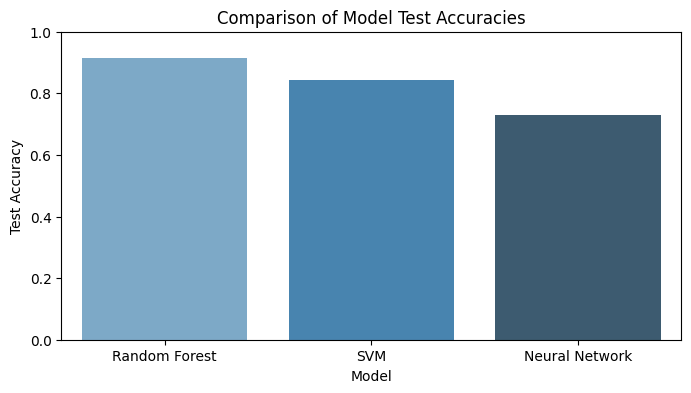

In [24]:
# Cell 6: Model Comparison (CPMK4)
# Perbandingan performa model
print("\n=== CPMK4: Model Comparison ===")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")

# Buat tabel perbandingan
comparison_data = {
    'Model': ['Random Forest', 'SVM', 'Neural Network'],
    'Test Accuracy': [rf_accuracy, svm_accuracy, nn_accuracy]
}
comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison Table:")
print(comparison_df)

# Visualisasi perbandingan akurasi
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Test Accuracy', data=comparison_df, palette='Blues_d')
plt.title('Comparison of Model Test Accuracies')
plt.ylim(0, 1)
plt.savefig('model_comparison.png')
plt.show()